# review

`-` 크롤링 단계

1. 크롬 개발자 도구를 이용하여 URL을 찾기

2. request(url) <-> response( `data(json,html)` )

3. data(`json, html`) $\to$ list, dict $\to$ 데이터프레임으로 변환!

# import

In [11]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import requests, json

# API : application programing interface

`-` 프로그램을 이용해서 데이터를 제공하는 서비스

`-` 어플리케이션을 등록 후 key값을 이용하여 데이터를 수령한다.

* url을 찾기 전에 서비스에 어플리케이션을 등록

    * 그러면 키값을 주는데, 키값을 이용해 url에 접속하여 request, response를 수행한다.

# Naver API

## step 1. request token 얻기

`1`. [링크로 가서 로그인](https://developers.naver.com)

`2`. application 등록

<img src = "API.png" width = 300>

`3` 발급받은 Id와 key값 가져오기

In [3]:
client_id = "mLybjqT4lxorLlFR0q21"

client_secret = "AhgPjWhfH_"

`-` 잠시요약

* 어제와 다른점 1 : API를 등록하고 key값을 받아서 request를 해야함

* 어제와 다른점 2 : 문서를 확인해서 url을 받아옴

## step2. 파파고 번역 api

1. 파파고 번역 api

- https://developers.naver.com/docs/papago/

- 사용법
    - https://developers.naver.com/docs/papago/papago-nmt-api-reference.md

### (1) url, header data, 임의 data를 입력

In [9]:
# url
url = "https://openapi.naver.com/v1/papago/n2mt"

# header data
headers = {
    "Content-Type" : "application/json",
    "X-Naver-Client-Id" : client_id,
    "X-Naver-Client-Secret" : client_secret
}

# data
ko_text = "웹크롤링은 재미있고 돈이 됩니다."
params = {"source" : "ko", "target" : "en", "text" : ko_text}
params

{'source': 'ko', 'target': 'en', 'text': '웹크롤링은 재미있고 돈이 됩니다.'}

### (2) Request(url,headers,data), Response

`-` 일단 에러(400)이 뜬다. 당황하지말자

In [15]:
response = requests.post(url,data=params, headers=headers)
response

<Response [400]>

In [17]:
response.text

'{"errorCode":"-10001","errorMessage":"INVALID_REQUEST"}'

`-` 에러를 확인헤보니 내가 요청할 때 뭔가 잘못요청했다....

* 이유 : 웹 환경에서는 한글을 쓸 수가 없음 (영문, 숫자, 특수문자만 사용이 가능하다.)

* `'웹크롤링은 재미있고 돈이 됩니다.'` 이것 때문에 그럼

* 인코딩 후 인코딩한 데이터를 전달하면 끝!

In [19]:
json.dumps(params)

'{"source": "ko", "target": "en", "text": "\\uc6f9\\ud06c\\ub864\\ub9c1\\uc740 \\uc7ac\\ubbf8\\uc788\\uace0 \\ub3c8\\uc774 \\ub429\\ub2c8\\ub2e4."}'

`-` 인코딩한 데이터를 전달하니 정상적으로 작동한다!

In [21]:
response = requests.post(url,data=json.dumps(params), headers=headers)
response

<Response [200]>

In [30]:
response.json()

{'message': {'result': {'srcLangType': 'ko',
   'tarLangType': 'en',
   'translatedText': 'Web crawling is fun and money.',
   'engineType': 'N2MT'},
  '@type': 'response',
  '@service': 'naverservice.nmt.proxy',
  '@version': '1.0.0'}}

`-` 위에 딕셔너리의 구조에 맞게 접근하여 번역된 글씨체를 읽어옴

In [31]:
en_text = response.json()["message"]["result"]["translatedText"]
en_text

'Web crawling is fun and money.'

### (3) 위 과정을 함수로 작성 

In [51]:
def translate (ko_text) :
    # 1. 어플리케이션 key가 필요
        client_id = "mLybjqT4lxorLlFR0q21"

        client_secret = "AhgPjWhfH_"
    # 2. url, header, 요청할 data가 필요
        url = "https://openapi.naver.com/v1/papago/n2mt"
        headers = {
            "Content-Type" : "application/json",
            "X-Naver-Client-Id" : client_id,
            "X-Naver-Client-Secret" : client_secret
        }
        params = {"source" : "ko", "target" : "en", "text" : ko_text}
    # 3. request(url,header,json.dumper(한국어 데이터)) -> response
        response = requests.post(url,data=json.dumps(params), headers=headers)
    # 4. response.json()["message"]["result"]["translatedText"]
        en_text = response.json()["message"]["result"]["translatedText"]
        
        return en_text

In [44]:
translate("난 짱")

"I'm the best"

### (4) 한글 엑셀파일을 영문으로...

In [37]:
%ls covid.xlsx

 D 드라이브의 볼륨: 새 볼륨
 볼륨 일련 번호: EC13-2D50

 D:\projects\mysite2\posts\DX\03. 데이터 수집 디렉터리

2023-09-05  오전 11:16             8,911 covid.xlsx
               1개 파일               8,911 바이트
               0개 디렉터리  1,985,536,040,960 바이트 남음


In [52]:
df =  pd.read_excel("covid.xlsx")
df.head()

,category,title
0,101,"SK바이오사이언스, 코로나19 백신 임상 3상 시험계획 제출"
1,102,고양시 노래연습장 코로나19 누적확진 41명
2,103,"코로나19 신규 감염, 28일 오후 9시까지 542명"
3,103,프로야구 수도권 구단서 코로나19 확진자 발생
4,104,"""코로나 확진자 '0명'인 날은 절대 오지 않는다"" 美전문가"


In [55]:
df["en_title"] = df["title"].apply(translate)
df.head()

,category,title,en_title
0,101,"SK바이오사이언스, 코로나19 백신 임상 3상 시험계획 제출",SK Bioscience Submits Phase 3 Trial Plan for C...
1,102,고양시 노래연습장 코로나19 누적확진 41명,41 cumulative confirmed cases of COVID-19 at t...
2,103,"코로나19 신규 감염, 28일 오후 9시까지 542명","New COVID-19 infections, 542 people by 9 p.m. ..."
3,103,프로야구 수도권 구단서 코로나19 확진자 발생,A confirmed case of COVID-19 occurred at a clu...
4,104,"""코로나 확진자 '0명'인 날은 절대 오지 않는다"" 美전문가","""The day when there are '0' confirmed cases of..."


***

# 통합검색어 트렌드 api 

- do next....
- 서비스 : `https://datalab.naver.com/keyword/trendSearch.naver`
- 내 애플리케이션 > dss 애플리케이션 > API 설정 > 데이터랩(검색어 트렌드) 추가
- 사용법 : `https://developers.naver.com/docs/serviceapi/datalab/search/search.md#통합-검색어-트렌드`

***

# 공공 데이터 포털
- 국토교통부_(TAGO)_카셰어링정보 크롤링

## 1. 일반 인증키(Decoding)을 복사

In [57]:
key = "2CjDf/qtlvs6cVGGPWlOxuA17ErE10FWrFyaKbxNGn6A0xcnckRQLFzLIMF2X1/3K/bfREKbKEv/PkfB7zVSuw=="

## 2. url + key + zonename

In [72]:
zonename = "서울역"
url = 'http://apis.data.go.kr/1613000/CarSharingInfoService/getCarZoneListByName'
url += f"?serviceKey={key}&zoneName={zonename}&_type=json"
url

'http://apis.data.go.kr/1613000/CarSharingInfoService/getCarZoneListByName?serviceKey=2CjDf/qtlvs6cVGGPWlOxuA17ErE10FWrFyaKbxNGn6A0xcnckRQLFzLIMF2X1/3K/bfREKbKEv/PkfB7zVSuw==&zoneName=서울역&_type=json'

## 3. response

In [76]:
response = requests.get(url)
#response.json()

In [74]:
data = response.json()["response"]["body"]["items"]["item"]
df = pd.DataFrame(data)
df

,address,latitude,longitude,type,zoneId,zoneName
0,서울 중구 남대문로5가 581,37.554298,126.973892,1,S0000808,서울역 10번출구(서울시티타워)(운영종료)
1,서울 용산구 동자동 43-205 서울역(철도역),37.555862,126.970505,2,10519,서울역사
2,서울 용산구 동자동 45 센트레빌아스테리움서울,37.551563,126.973236,2,10981,서울역 12번출구(KDB생명타워)
3,서울 중구 남대문로5가 827 T타워,37.553902,126.975677,2,12196,서울역 10번출구 옆(T타워)
4,서울 용산구 청파로 369(서계동),37.552456,126.968330,2,1754,롯데렌탈 서울역지점 2층(B)
5,서울 용산구 동자동 56 트윈시티 남산,37.551189,126.972939,2,7426,서울역 12번출구(갈월동)
6,서울 용산구 서계동 47-2 대한통운서울지사,37.552486,126.968964,2,9442,서울역 15번출구(국립극단옆EV)


***

# 직방 크롤링

* do next....

***

# html_css_selector

## 1. html intro

`-` 웹페이지의 레이아웃 및 텍스트 데이터를 출력하는 언어

`-` 아래와 같은 계층적 구조를 가짐 (각각의 계층은 같은 계층끼리도 서로 하위에 포함시킬 수 있다.)

* element : 시작 tag와 끝 tag로 구성 (`<div> python /<div>`)
    * tag : 
        * text 
    
`-` 시작태그(`<div>`) 안에는 속성값이 들어있다. (`(id, class, attribute 등등)`)

`-` id, class : 엘리먼트를 선택하기위한 용도로 사용되는 속성값 (id는 고유값, 클래스는 중복된 값을 가질 수 있으나.. 띄어쓰기로 구분한다.)

`-` attribute : 정보를 저장하기 위한 속성값

* `img src = "url......"`

## 2. tag 종류

`-` div : 레이아웃을 나타내는 tag

`-` p, span : 문자열을 나타내주는 tag

`-` ul, li : 목록을 나타내주는 tag

`-` a : link를 나타내주는 tag -> 속성값으로 `href`를 가짐

`-` img : 이미지, source 약자인 `src`를 속성값으로 가지는 tag

## 3. css selector

`-` 엘리먼트를 선택하기 위한 문법

`-` 아래와 같은 두 개의 element가 있다고하자.

```python
<div> id="d1" class = "data no1" data1 value = "1"</div>
<p> id="d2" class = "data no2" data2</p>

```

`-` element 선택 1. tag를 이용

* tag -> div -> data1

* tag -> p -> data2


`-` element 선택 2. id를 이용

*  #d1 : 엘리먼트 1 선택

`-` element 선택 3. class를 이용

* class : .data1 $\to$ data1,data2 엘리먼트 선택

* class :  .no1, .no2 $\to$ data1,data2 엘리먼트 선택

`-` 속성값을 이용하여 선택

* attribute : [value = "1"] : data1 엘리먼트 선택

`-` n번째 엘리먼트 선택법

* p:nth-child(2) : data2 엘리먼트 선택 (각 레이아웃에서 `두 번째` 엘리먼트 중에 `tag`가 `p`이면 선택하라는 의미)

```python
<div>
    <p class="d">data1</p>
    <p class=" ">data2</p>
    <span class="d" data3> 
<\div>

* .d:nth-child(2) : `두 번째` 엘리먼트 중에 `class`가 `d`이면 선택하라는 의미 $\to$ 아무것도 선택안됌
* .d:nth-child(3) : `data3` 엘리먼트 선택

***

`-` 계층적 선택

```python
<div>
    <p class="d">data1</p>
    <p class=" ">data2</p>
    <span class="d" data3> 
    <div class= ""> <p class="d">data4</p> </div>
</div>

* div > p : data1, data2 선택 (한 단계 아래의 엘리먼트 중에서!)

* div p : data1, data2, data3 엘리먼트 선택 (모든 하위 엘리먼트 중에서!)

## 실습 1 : 네이버 연관 검색어 수집

`-` 정적 데이터 수집(`html`)

`-` 삼성전자 연관검색어 수집

### 0. import

In [84]:
import pandas as pd 
import requests 
from bs4 import BeautifulSoup

### 1. URL 찾기

In [146]:
query = '삼성전자' 
url = f'https://search.naver.com/search.naver?query={query}' 
url

'https://search.naver.com/search.naver?query=삼성전자'

### 2.  request(url), response(data)

In [147]:
response = requests.get(url)
response

<Response [200]>

### 3. html(str), bs object

`-` bs 오브젝트 생성

In [148]:
dom = BeautifulSoup(response.text,"html.parser")

type(dom)

bs4.BeautifulSoup

### 4. 크롤링

`-` 브라우저에서 해당 연관검색어의 selector을 카피

In [149]:
selector = "#nx_right_related_keywords > div > div.related_srch > ul > li"

`-` **.select(css-selector)**  $\to$ text

In [150]:
elements = dom.select(selector)

In [107]:
len(elements)

10

`-` **.select_one(css-selector)** $\to$ text

In [116]:
elements[0].select_one(".tit").text

'삼성전자주가'

`-` 리스트 컴프리헨션으로 연관검색어 정리

In [125]:
keywords = [i.select_one(".tit").text for i in elements]
#pd.DataFrame({"keywords" : keywords})

### 5. 함수로 작성

In [129]:
def c(query = '삼성전자') : 
    # 1. url 입력
    url = f'https://search.naver.com/search.naver?query={query}' 
    # 2. requset -> response
    response = requests.get(url)
    # 3. bs객체 생성
    dom = BeautifulSoup(response.text,"html.parser")
    # 4. 연관검색어 개체의 selector 카피
    selector = "#nx_right_related_keywords > div > div.related_srch > ul > li"
    # 5. 키워드로 저장
    elements = dom.select(selector)
    keywords = [i.select_one(".tit").text for i in elements]
    
    return pd.DataFrame({"keywords" : keywords})

In [131]:
#c()

***

## 실습 2 : 지마켓 크롤링

`-` 지마켓 베스트 상품 크롤링

### `1`. url 등록

In [152]:
url = "https://www.gmarket.co.kr/n/best"

### `2` response

In [153]:
response = requests.get(url)

### `3` bs객체 생성

In [154]:
dom = BeautifulSoup(response.text,"html.parser")

### `4` selector 카피

In [155]:
selector = "#gBestWrap > div.best-list > ul > li"

### `5` elements 생성 후 타이틀, 이미지url, 할인가 불러오기

In [169]:
elements = dom.select(selector)

In [187]:
element = elements[0]

In [191]:
data = {
    "title": element.select_one(".itemname").text,
    "img" : "http:" + element.select_one("img").get("src"),
    "sprice": element.select_one(".s-price").text
}

In [192]:
data

{'title': '자연산 손질 통 오징어 10미(1.3kg내외)',
 'img': 'http://gdimg.gmarket.co.kr/3106295509/still/300?ver=20230905',
 'sprice': '할인가24,500원 30%'}

### `6` loop로 모든 데이터를 읽은 후 데이터 프레임을 변환

In [197]:
items = []
for element in elements :
    items.append({
    "title": element.select_one(".itemname").text,
    "img" : "http:" + element.select_one("img").get("src"),
    "sprice": element.select_one(".s-price").text
    })

In [240]:
df = pd.DataFrame(items)

### `7` 상품 이미지 데이터 저장

`(1)` 디렉토리 생성

In [214]:
import os
path = "imgs"
os.makedirs(path)

In [215]:
%ls

 D 드라이브의 볼륨: 새 볼륨
 볼륨 일련 번호: EC13-2D50

 D:\projects\mysite2\posts\DX\03. 데이터 수집 디렉터리

2023-09-05  오후 03:56    <DIR>          .
2023-09-04  오후 05:12    <DIR>          ..
2023-09-05  오전 09:31    <DIR>          .ipynb_checkpoints
2023-09-04  오후 05:11           235,320 2023-09-04-00. 데이터 수집 (1).ipynb
2023-09-05  오후 03:54            44,753 2023-09-05-01. 데이터 수집 (2).ipynb
2023-09-05  오전 10:18            60,688 API.png
2023-09-05  오전 11:16             8,911 covid.xlsx
2023-09-05  오후 03:56    <DIR>          imgs
               4개 파일             349,672 바이트
               4개 디렉터리  1,985,535,983,616 바이트 남음


`(2)` img-url 

In [241]:
link = df.loc[0,"img"]
link

'http://gdimg.gmarket.co.kr/3106295509/still/300?ver=20230905'

`(3)` request

In [221]:
response = requests.get(link)
response

<Response [200]>

`(4)` 이미지 저장

In [228]:
with open(f"{path}/test.jpg","wb") as file :
    file.write(response.content)

`(5)` 이미지 열어보기

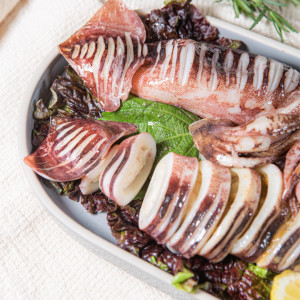

In [230]:
from PIL import Image as pil
pil.open(f"{path}/test.jpg")

`(6)` loop를 이용하여 작성

In [246]:
for idx, data in df[:5].iterrows() : 
    link = data["img"]
    response = requests.get(link)
    with open(f"{path}/{idx}.jpg","wb") as file :
        file.write(response.content)

오 신기 신기

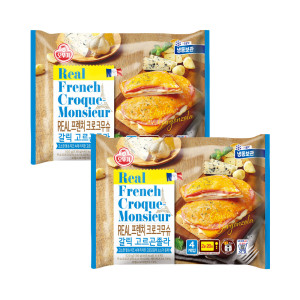

In [247]:
pil.open(f"{path}/3.jpg")

# extra

`-` 크롤링으로 발생되는 문제

1. 지적 재산권이나 업무방해에 의한 손해배상 문제가 발생할 수 있다.

    * 논문 크롤링으로 인해 발생한 손해배상금으로 자살한 사례 발생
    
2. 경쟁사 데이터를 자기 회사 업무에 사용한 사례

    * 몇 십년에 걸려 몇 십억에 손해 배상금을 받아냄

3. 따라서, 우리는 크롤링 시 주의해야함.(범죄를 저지르지 않을? 선에서 크롤링을 하자...)